In [3]:
import polars as pl
import seaborn as sns
import numpy as np

In [2]:
models = pl.read_csv('models.csv', infer_schema_length=None)
models = models.select(pl.col('model'), pl.col('acc1').cast(pl.Float32), pl.col('acc5').cast(pl.Float32),
                       pl.col('params'), pl.col('gflops'))

In [37]:
accuracies = np.arange(90, 97)
best_gflops = np.zeros((len(accuracies),))
best_params = np.zeros((len(accuracies),))
for i, accuracy in enumerate(accuracies):
    filtered = models.filter(pl.col('acc5') > accuracy).sort(pl.col('gflops'))[0]
    best_gflops[i] = filtered['gflops'].item()
    best_params[i] = float(filtered['params'].item()[:-1])

In [38]:
sns.set_theme()

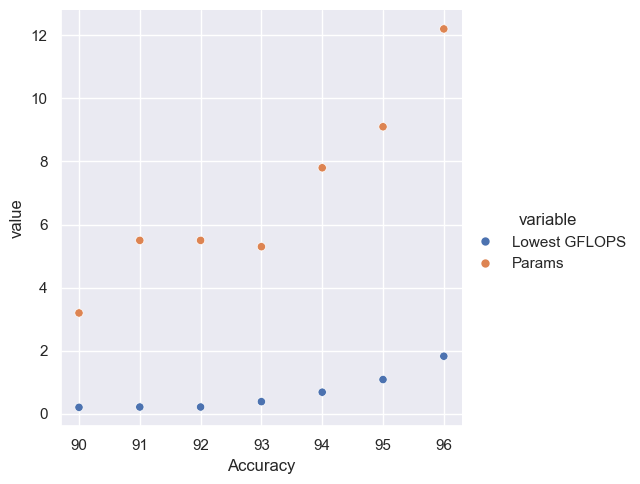

In [46]:
sns.relplot(
    x='Accuracy', y='value', hue='variable',
    data=pl.DataFrame({"Accuracy": accuracies, "Lowest GFLOPS": best_gflops, "Params": best_params}).melt('Accuracy')
)

In [49]:
models.filter(pl.col('acc5') > 92).sort(pl.col('gflops'))

model,acc1,acc5,params,gflops
str,f32,f32,str,f64
"""MobileNet_V3_L…",75.274002,92.566002,"""5.5M""",0.22
"""EfficientNet_B…",77.692001,93.531998,"""5.3M""",0.39
"""RegNet_Y_400MF…",75.804001,92.741997,"""4.3M""",0.4
"""RegNet_X_400MF…",74.863998,92.321999,"""5.5M""",0.41
"""MNASNet1_3_Wei…",76.505997,93.522003,"""6.3M""",0.53
…,…,…,…,…
"""RegNet_Y_128GF…",86.068001,97.844002,"""644.8M""",127.52
"""ViT_H_14_Weigh…",85.708,97.730003,"""632.0M""",167.29
"""ViT_L_16_Weigh…",88.064003,98.512001,"""305.2M""",361.99


In [ ]:
'EfficientNet_B2_Weights.IMAGENET1K_V1'